In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FinalData.csv', sep = ';', na_values = 'NaN')

# Data Processing

Przygotowanie danych do analizy, przekodowanie wartości z kolumn na osobne kolumny, utworzenie nowych zmiennych.

In [3]:
df.ocena = df.ocena.str.replace(',','.')
df.ocena = df.ocena.astype(np.float64)
df.long = df.long.astype(np.float64)
df.ilosc_recenzji = df.ilosc_recenzji.astype(np.float64)
df['facebook'] = np.float64(df.strona_internetowa.str.contains('facebook').fillna(False))
df.accessibility = np.float64(df.accessibility.str.contains('Wheelchair').fillna(False)) #Niepelnosprawnosc

In [4]:
"""hours_columns = ['open_hours_monday', 'close_monay', 'tuesday', 'close_tue', 'wednesday',
                 'closed_wed', 'thursday', 'closed_thu', 'friday', 'closed_fri',
                 'saturday', 'closed_sat', 'sunday', 'closed_sun']


for column in hours_columns:
    new_column = []
    for el in df[column]:
        try:
            new_column.append(time.strptime(el, '%H:%M:%S').tm_hour)
        except:
            new_column.append(np.nan)
    df[column] = new_column"""
print()

In [5]:
hours_columns = [['open_hours_monday', 'close_monay'],
                 ['tuesday', 'close_tue'],
                 ['wednesday','closed_wed'],
                 ['thursday', 'closed_thu'],
                 ['friday', 'closed_fri'],
                 ['saturday', 'closed_sat'],
                 ['sunday', 'closed_sun']]

columnsToDrop = ['open_hours_monday', 'close_monay', 'tuesday', 'close_tue', 'wednesday',
                 'closed_wed', 'thursday', 'closed_thu', 'friday', 'closed_fri',
                 'saturday', 'closed_sat', 'sunday', 'closed_sun']

for pair_column in hours_columns:
    temp = []
    for column in pair_column:
        new_column = []
        for el in df[column]:
            try:
                new_column.append(time.strptime(el, '%H:%M:%S').tm_hour)
            except:
                new_column.append(np.nan)
        new_column = np.array(new_column)
        temp.append(new_column)
    wyjsciowaIloscGodzin = temp[1] - temp[0]
    roznicaDni = 24*np.float64(wyjsciowaIloscGodzin<0)
    toReturn = wyjsciowaIloscGodzin + roznicaDni
    whereAreNan = np.isnan(toReturn)
    toReturn[whereAreNan] = 0
    
    day = pair_column[1].split('_')
    name = 'Working_hour_' + day[1]
    
    df[name] = toReturn
    
df = df.drop(columnsToDrop, axis = 1)

D:\Games\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


In [6]:
def make_dummy_variable(df, column):
    """ Funkcja tworząca kolumny typu dummy variable z pojedynczej kolumny."""
    df[column] = df[column].str.lower()

    a = [el.split(',') for el in df[column].unique() if type(el) == str]
    b = [el for lista in a for el in lista]
    c = [el[1:] if el.startswith(' ') else el for el in b]
    d = [el[:-1] if el.endswith(' ') else el for el in c]
    unique = list(set(d))
    print(unique)

    for el in unique:
        df[el] = np.float64(df[column].str.contains(el).fillna(False)) 
    return df

In [7]:
to_change = ['Offerings', 'highlights', 'Dining_options', 'Amenities', 'Atmosphere', 'Crowd', 'Payments']

for el in to_change:
    df = make_dummy_variable(df, el)

to_drop = to_change + ['nan']
df = df.drop(to_drop, axis = 1)

['salad', "kids' menu", 'eko', 'vegan', 'salad bar', 'wine', 'beer', 'halal food', 'vegetarian options', 'organic dishes', 'late-night food', 'all you can eat', 'happy hour food']
['live music', 'bar games', 'fireplace', 'women-led', 'sport', 'karaoke', 'outdoor seating', 'great cocktails', 'garden']
[' supper', 'supper', 'seating', 'delivery', 'toilet', 'catering', 'breakfast', 'good for kids', 'dinner', 'lunch', 'dessert']
['bar onsite', 'wi-fi', 'high chairs', 'toilet', 'do_karmienia', 'good for kids']
['casual', 'cosy', 'trending']
['groups', 'family friendly']
['cash', 'credit cards', 'nfc', 'nan', 'reservations required', 'debit card']


In [8]:
df.head()

,nazwa,adres,strona_internetowa,lat,long,ocena,ilosc_recenzji,accessibility,czy_sieciowka,facebook,...,casual,cosy,trending,groups,family friendly,cash,credit cards,nfc,reservations required,debit card
0,Pijalnia Wódki i Piwa,"Rynek 13/14, 50-101 Wrocław",NaN,51.110446,17.032568,4.2,537.0,1.0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Forma Plynna,"wybrzeże Stanisława Wyspiańskiego 20, 50-370 W...",https://www.facebook.com/FormaPlynna/,51.107954,17.057186,4.6,303.0,0.0,0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pizzeria Bravo,"plac Grunwaldzki 18, 48-300 Wrocław",http://www.bravo.wroclaw.pl/,51.111057,17.057905,4.0,587.0,1.0,0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Warzywniak,"plac Grunwaldzki 18-20, 50-348 Wrocław",NaN,51.111057,17.057905,4.6,170.0,1.0,0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Remont Bar,"plac Grunwaldzki 18, 48-300 Wrocław",https://www.facebook.com/Bar.Remont,51.111210,17.058386,4.4,374.0,1.0,0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.describe()

,lat,long,ocena,ilosc_recenzji,accessibility,czy_sieciowka,facebook,Working_hour_monay,Working_hour_tue,Working_hour_wed,...,casual,cosy,trending,groups,family friendly,cash,credit cards,nfc,reservations required,debit card
count,222.000000,222.000000,222.000000,222.000000,222.00000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,51.109168,17.032141,4.009009,147.873874,0.50000,0.324324,0.184685,9.256757,9.734234,9.815315,...,0.815315,0.522523,0.018018,0.540541,0.121622,0.022523,0.013514,0.022523,0.004505,0.157658
std,0.021751,0.033798,0.702426,182.625826,0.50113,0.469180,0.388918,4.097436,3.515525,3.391117,...,0.388918,0.500621,0.133317,0.499480,0.327587,0.148711,0.115720,0.148711,0.067116,0.365243
min,51.030323,16.962195,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.101322,17.012245,3.700000,27.000000,0.00000,0.000000,0.000000,8.250000,9.000000,9.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.113294,17.034007,4.200000,86.500000,0.50000,0.000000,0.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.120933,17.051558,4.500000,187.500000,1.00000,1.000000,0.000000,12.000000,12.000000,12.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.150938,17.120709,5.000000,1122.000000,1.00000,1.000000,1.000000,23.000000,23.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
odleglosci2 = []

for index, row1 in df.iterrows():
    odleglosci2.extend(np.sqrt((row1.long - df.long)**2 + (row1.lat - df.lat)**2).values.tolist())
    
odleglosci2 = [el for el in odleglosci2 if el!= 0]

kwantyle = np.percentile(odleglosci2, [10, 40, 75])

In [11]:
kolumny = [[],[],[]]

for index, row1 in df.iterrows():
    odleglosci_od_innych_lokali = np.sqrt((row1.long - df.long)**2 + (row1.lat - df.lat)**2).values.tolist() 
    for i in range(3):
        kolumny[i].append(np.sum(odleglosci_od_innych_lokali <= kwantyle[i]))
        
odleglosci = pd.DataFrame(data = {'blisko':kolumny[0],'srednio':kolumny[1],'daleko':kolumny[2]})
df = pd.concat([df, odleglosci], axis = 1)

# Analysis

Wizualizacja rozkładu ocen oraz ilości recenzji

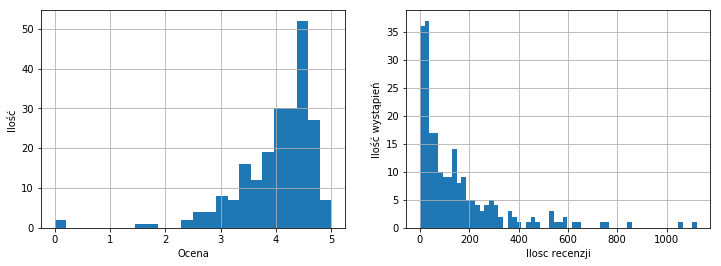

In [12]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
df.ocena.hist(bins = 24)
plt.xlabel('Ocena')
plt.ylabel('Ilość')

plt.subplot(1,2,2)
df.ilosc_recenzji.hist(bins = 60)
plt.xlabel('Ilosc recenzji')
plt.ylabel('Ilość wystąpień')

plt.show()

Stworzenie zmiennych klasyfikujących dobre lokale

In [13]:
df['dobry_lokal'] = np.float64(np.logical_and(df.ilosc_recenzji > 150, df.ocena >= 4.4))
df.dobry_lokal.sum()

35.0

In [14]:
df['dobry_lokal2'] = np.float64(np.logical_or(df.ilosc_recenzji > 300, np.logical_and(df.ilosc_recenzji >= 50, df.ocena >= 4.5)))
df.dobry_lokal2.sum()

61.0

Rozkład odległości pomiędzy lokalami

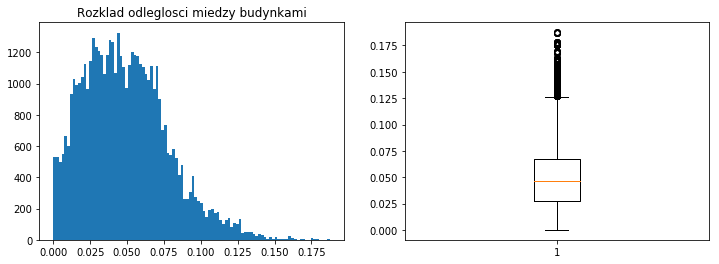

In [15]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
plt.hist(odleglosci2, bins = 100)
plt.title('Rozklad odleglosci miedzy budynkami')

plt.subplot(1,2,2)
plt.boxplot(odleglosci2)

plt.show()

Korelacje

In [16]:
korelacje = df.corr()[['ilosc_recenzji', 'ocena', 'dobry_lokal', 'dobry_lokal2']]
for idx, row in korelacje[abs(korelacje) > 0.3].iterrows():
    if not row.isnull().all():
        print('{:6.2f} {:6.2f} {:6.2f} {:6.2f} {}'.format(row.ilosc_recenzji, row.ocena, row.dobry_lokal, row.dobry_lokal2, row.name))

   nan   1.00   0.32   0.40 ocena
  1.00    nan   0.48   0.62 ilosc_recenzji
   nan    nan    nan   0.31 good for kids
   nan   0.35   0.34   0.35 cosy
  0.30    nan    nan    nan groups
  0.48   0.32   1.00   0.56 dobry_lokal
  0.62   0.40   0.56   1.00 dobry_lokal2


Skorelowanie:
- Good for kids z dobry_lokal
- Cosy z ilość recenzji
- Groups z ocena

In [17]:
a = df.groupby('dobry_lokal').mean()

for col in a.columns:
    print('{:6.2f} {:6.2f} {}'.format(a[col][0], a[col][1], col))

 51.11  51.11 lat
 17.03  17.05 long
  3.91   4.53 ocena
110.41 348.06 ilosc_recenzji
  0.51   0.46 accessibility
  0.36   0.14 czy_sieciowka
  0.15   0.37 facebook
  9.26   9.23 Working_hour_monay
  9.66  10.11 Working_hour_tue
  9.76  10.11 Working_hour_wed
  9.78  10.23 Working_hour_thu
  9.89  10.74 Working_hour_fri
  8.94  10.49 Working_hour_sat
  7.92   9.77 Working_hour_sun
  0.04   0.00 salad
  0.13   0.23 kids' menu
  0.01   0.00 eko
  0.03   0.09 vegan
  0.01   0.00 salad bar
  0.14   0.40 wine
  0.20   0.49 beer
  0.01   0.06 halal food
  0.10   0.26 vegetarian options
  0.02   0.03 organic dishes
  0.16   0.17 late-night food
  0.02   0.00 all you can eat
  0.01   0.03 happy hour food
  0.03   0.06 live music
  0.01   0.06 bar games
  0.02   0.06 fireplace
  0.01   0.00 women-led
  0.00   0.03 sport
  0.01   0.00 karaoke
  0.05   0.11 outdoor seating
  0.06   0.29 great cocktails
  0.03   0.00 garden
  0.06   0.03  supper
  0.06   0.03 supper
  0.05   0.20 seating
  0.34   

In [18]:
a = df.groupby('dobry_lokal2').mean()

for col in a.columns:
    print('{:6.2f} {:6.2f} {}'.format(a[col][0], a[col][1], col))

 51.11  51.11 lat
 17.03  17.04 long
  3.83   4.47 ocena
 78.32 331.46 ilosc_recenzji
  0.46   0.61 accessibility
  0.35   0.25 czy_sieciowka
  0.14   0.30 facebook
  9.29   9.16 Working_hour_monay
  9.64   9.98 Working_hour_tue
  9.70  10.13 Working_hour_wed
  9.72  10.20 Working_hour_thu
  9.84  10.49 Working_hour_fri
  8.95   9.80 Working_hour_sat
  7.94   8.93 Working_hour_sun
  0.04   0.02 salad
  0.11   0.23 kids' menu
  0.01   0.00 eko
  0.02   0.08 vegan
  0.01   0.02 salad bar
  0.15   0.28 wine
  0.19   0.39 beer
  0.01   0.05 halal food
  0.09   0.20 vegetarian options
  0.02   0.03 organic dishes
  0.14   0.21 late-night food
  0.02   0.00 all you can eat
  0.01   0.02 happy hour food
  0.02   0.07 live music
  0.01   0.03 bar games
  0.02   0.05 fireplace
  0.01   0.00 women-led
  0.00   0.02 sport
  0.01   0.00 karaoke
  0.04   0.11 outdoor seating
  0.04   0.23 great cocktails
  0.02   0.03 garden
  0.05   0.07  supper
  0.05   0.07 supper
  0.05   0.15 seating
  0.35   

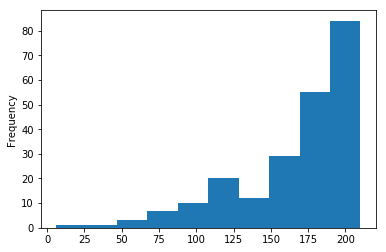

In [19]:
df.daleko.plot(kind = 'hist')
plt.show()

# Models

### Klasyfikacja

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

D:\Games\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
df3 = df.fillna(0)

In [22]:
Y = df3.dobry_lokal2
X = df3.drop(['ocena', 'nazwa', 'adres', 'strona_internetowa', 
             'lat', 'long', 'ilosc_recenzji', 'dobry_lokal','dobry_lokal2'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [24]:
modele = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 100), GradientBoostingClassifier()]

In [25]:
wybraneCechy = []

for model in modele:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    res_cv = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'precision')
    
    print(model.__class__.__name__)
    #print(model)
    print('Accuracy = ', accuracy)
    print('ROC AUC = ', roc)
    print('Cross Validation = ', np.mean(res_cv))
    wazneCechy = pd.DataFrame({'cechy':X.columns, 'wazne':np.round(model.feature_importances_, 3)})
    wazneCechy = wazneCechy.sort_values('wazne', ascending = False)
    wazneCechy = wazneCechy.head(5)
    wybraneCechy.extend(wazneCechy.cechy.values.tolist())
    print(wazneCechy)
    print('-'*30)

DecisionTreeClassifier
Accuracy =  0.577777777778
ROC AUC =  0.516666666667
Cross Validation =  0.333333333333
               cechy  wazne
58            daleko  0.169
48              cosy  0.123
57            blisko  0.088
6   Working_hour_thu  0.063
9   Working_hour_sun  0.061
------------------------------


D:\Games\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier
Accuracy =  0.755555555556
ROC AUC =  0.666666666667
Cross Validation =  0.483333333333
               cechy  wazne
58            daleko  0.105
59           srednio  0.090
57            blisko  0.083
39     good for kids  0.048
9   Working_hour_sun  0.046
------------------------------
GradientBoostingClassifier
Accuracy =  0.755555555556
ROC AUC =  0.683333333333
Cross Validation =  0.485
              cechy  wazne
59          srednio  0.201
58           daleko  0.146
57           blisko  0.113
48             cosy  0.042
30  great cocktails  0.035
------------------------------


In [26]:
list(set(wybraneCechy))

['srednio',
 'Working_hour_sun',
 'great cocktails',
 'Working_hour_thu',
 'cosy',
 'daleko',
 'good for kids',
 'blisko']

Wizualizacja dobrych lokali na mapie Wrocławia

In [27]:
import plotly as py
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1Ijoic2F2aW45IiwiYSI6ImNqaWV6aTZhZTA1b2Yzd3BhaDNzMGU1NGcifQ.8GRZAoIigmU-6gUGr_Y6cA'

data = [
    go.Scattermapbox(
        lat=df.lat.tolist(),
        lon=df.long.tolist(),
        mode='markers',
        marker=dict(
            size=12,
            color = df.dobry_lokal2.tolist(),
            colorscale = [[0, 'rgb(165,0,38)'], [1, 'rgb(34,139,34)']]
        ),
        text=df.nazwa.tolist(),
        hovertext = df.nazwa
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=51.10,
            lon=17.025
        ),
        pitch=0,
        zoom=12
    ),
)

fig = dict(data=data, layout=layout)
py.offline.plot(fig, filename='Multiple Mapbox.html')

'file://D:\\Projekty\\Gravity Final Version\\gravity\\Multiple Mapbox.html'